<a href="https://colab.research.google.com/github/olusipedaniel/zero-to-mastery-exercises/blob/main/03_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Spend 20-minutes reading and interacting with the CNN explainer website.
  * What are the key terms? e.g. explain convolution in your own words, pooling in your own words

2. Play around with the "understanding hyperparameters" section in the CNN explainer website for 10-minutes.
    * What is the kernel size?
    * What is the stride?
    * How could you adjust each of these in TensorFlow code?

3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [1]:
# Importing tensorflow
import tensorflow as tf
tf.__version__

'2.8.2'

### 3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

I have uploaded an image classifier dataset in my drive which contains 10 images of cars and 10 images of motorbikes.

The goal is to train a classifier that will classify between a cars and motorbikes.

In [2]:
# Mounting drive to colab
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Setting up path to dataset
train_dir="/content/drive/MyDrive/cars_and_motorbikes"

In [4]:
import os

# Checking the number of images in each directory
for dirpath,dirnames,filenames in os.walk("/content/drive/MyDrive/cars_and_motorbikes"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in /content/drive/MyDrive/cars_and_motorbikes.
There are 0 directories and 10 images in /content/drive/MyDrive/cars_and_motorbikes/motorbikes.
There are 0 directories and 10 images in /content/drive/MyDrive/cars_and_motorbikes/cars.


In [5]:
# Importing ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to rescale images and split dataset into training and validation split 
train_datagen=ImageDataGenerator(rescale = 1/255., 
                                 validation_split = 0.2)

# Loading image file from directories 
train_data=train_datagen.flow_from_directory(train_dir, 
                                             batch_size=2, 
                                             target_size=(224,224), 
                                             class_mode="binary", 
                                             seed=42, 
                                             subset="training")

valid_data=train_datagen.flow_from_directory(train_dir, 
                                             batch_size=2, 
                                             target_size=(224,224), 
                                             class_mode="binary", 
                                             seed=42, 
                                             subset="validation")

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [6]:
# Importing numpy and pathlib
import numpy as np
import pathlib

# Getting the class names programmatically
data_dir=pathlib.Path("/content/drive/MyDrive/cars_and_motorbikes")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['cars', 'motorbikes'], dtype='<U10')

In [7]:
# Importting matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Creating a function to visualize random images from training images
def plot_random_images(target_dir):
  for i in range(2):
    plt.subplot(1,2,i+1)
    # Setting up target directory
    target_class=random.choice(class_names)
    target_folder=target_dir+"/"+target_class

    # Getting random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    target_image=target_folder+"/"+random_image[0]

    # Reading and plotting the image using matplotlib
    img=mpimg.imread(target_image)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

['015.jpg']
['004.jpg']


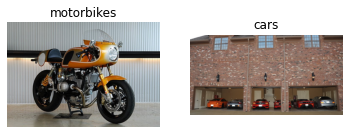

In [8]:
# Plotting random images
plot_random_images(target_dir="/content/drive/MyDrive/cars_and_motorbikes")

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# Setting random seed
tf.random.set_seed(42)

# Creating model
model_0=Sequential([
  Conv2D(filters=2,
         kernel_size=1,
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=1,padding="valid"),
  Conv2D(2,1,activation="relu"),
  MaxPool2D(pool_size=1,padding="valid"),
  Flatten(),
  Dense(1,activation="sigmoid")
])

# Compiling model
model_0.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics="accuracy")

# Fitting model
model_0.fit(train_data,
            epochs=10,
            validation_data=valid_data)

Epoch 1/10
8/8 [==============================] - 16s 556ms/step - loss: 3.1632 - accuracy: 0.3750 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 44ms/step - loss: 1.7990 - accuracy: 0.5625 - val_loss: 1.0769 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 0s 35ms/step - loss: 0.5644 - accuracy: 0.7500 - val_loss: 1.2019 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 0s 44ms/step - loss: 0.4949 - accuracy: 0.6250 - val_loss: 0.7113 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 44ms/step - loss: 0.2821 - accuracy: 0.9375 - val_loss: 0.6219 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 0s 44ms/step - loss: 0.2385 - accuracy: 1.0000 - val_loss: 0.6523 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 0s 42ms/step - loss: 0.1831 - accuracy: 0.9375 - val_loss: 0.7922 - val_accuracy: 0.5000
Epoch 8/10
8/8 [=========

In [10]:
# Evaluating model
model_0.evaluate(valid_data)

2/2 [==============================] - 0s 42ms/step - loss: 0.7485 - accuracy: 0.5000


[0.7484909892082214, 0.5]

### 4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset

In [11]:
# Importing LearningRateSchudeler
from tensorflow.keras.callbacks import LearningRateScheduler

# Defining lr_scheduler
lr_scheduler=LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

In [12]:
# Setting random seed
tf.random.set_seed(42)

# Creating model
lr_model=Sequential([
  Conv2D(filters=2,
         kernel_size=1,
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=1,padding="valid"),
  Conv2D(2,1,activation="relu"),
  MaxPool2D(pool_size=1,padding="valid"),
  Flatten(),
  Dense(1,activation="sigmoid")
])

# Compiling model
lr_model.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics="accuracy")

# Fitting model
lr_history=lr_model.fit(train_data,
                        epochs=10,
                        validation_data=valid_data,
                        callbacks=[lr_scheduler])

Epoch 1/10
8/8 [==============================] - 1s 63ms/step - loss: 1.0794 - accuracy: 0.6250 - val_loss: 1.4404 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - 0s 45ms/step - loss: 1.1565 - accuracy: 0.6250 - val_loss: 1.5595 - val_accuracy: 0.5000 - lr: 0.0011
Epoch 3/10
8/8 [==============================] - 0s 50ms/step - loss: 0.6240 - accuracy: 0.6875 - val_loss: 0.6236 - val_accuracy: 0.7500 - lr: 0.0013
Epoch 4/10
8/8 [==============================] - 0s 42ms/step - loss: 0.2707 - accuracy: 0.8125 - val_loss: 0.6102 - val_accuracy: 0.7500 - lr: 0.0014
Epoch 5/10
8/8 [==============================] - 0s 41ms/step - loss: 0.2185 - accuracy: 1.0000 - val_loss: 0.5816 - val_accuracy: 0.7500 - lr: 0.0016
Epoch 6/10
8/8 [==============================] - 0s 45ms/step - loss: 0.1335 - accuracy: 0.9375 - val_loss: 0.9149 - val_accuracy: 0.5000 - lr: 0.0018
Epoch 7/10
8/8 [==============================] - 0s 40ms/step - loss: 0.1221 - accuracy

Text(0, 0.5, 'Loss')

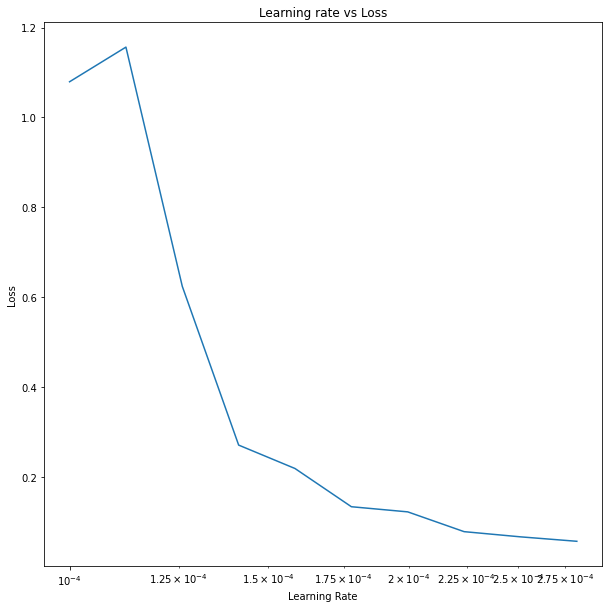

In [13]:
# Plotting learning rate curve
lr=1e-4*(10**(np.arange(10)/20))
plt.figure(figsize=(10,10))
plt.semilogx(lr,lr_history.history["loss"])
plt.title("Learning rate vs Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [14]:
# Getting ideal learning rate 
lr=2*1e-4
lr

0.0002

In [15]:
# Setting random seed
tf.random.set_seed(42)

# Creating model
model_1=Sequential([
  Conv2D(filters=2,
         kernel_size=1,
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=1,padding="valid"),
  Conv2D(2,1,activation="relu"),
  MaxPool2D(pool_size=1,padding="valid"),
  Flatten(),
  Dense(1,activation="sigmoid")
])

# Compiling model
model_1.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=lr),
                metrics="accuracy")

# Fitting model
history_1=model_1.fit(train_data,
                      epochs=10,
                      validation_data=valid_data)

Epoch 1/10
8/8 [==============================] - 1s 64ms/step - loss: 0.8323 - accuracy: 0.3125 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 44ms/step - loss: 0.6212 - accuracy: 0.6250 - val_loss: 0.6505 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 0s 37ms/step - loss: 0.5696 - accuracy: 0.7500 - val_loss: 0.6716 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 0s 39ms/step - loss: 0.4764 - accuracy: 0.8125 - val_loss: 0.6547 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 43ms/step - loss: 0.4106 - accuracy: 0.9375 - val_loss: 0.6164 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 0s 43ms/step - loss: 0.3634 - accuracy: 1.0000 - val_loss: 0.6243 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 0s 42ms/step - loss: 0.3683 - accuracy: 0.9375 - val_loss: 0.7480 - val_accuracy: 0.5000
Epoch 8/10
8/8 [===========

In [16]:
# Evaluating model
model_1.evaluate(valid_data)

2/2 [==============================] - 0s 47ms/step - loss: 0.6720 - accuracy: 0.5000


[0.6720202565193176, 0.5]

#### The model can be improved probably by providing more data for the model to learn or using transfer learning